# TASK 1
## Prediction using supervised ML
### Predict the percentage of the student based on the number of study hours
Author: Giftlin Devapriya K

In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
print("Libraries are imported")

Libraries are imported


In [3]:
# reading the data
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#check for empty values
df.isnull == True
#if false No null value if true null value is there

False

##### No null value found in the dataset, It's time for visualizing data

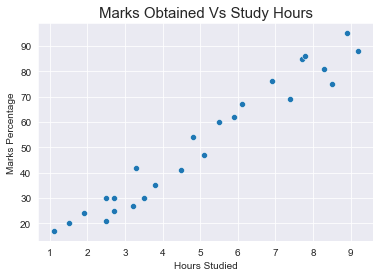

In [5]:
# Data Vizualization
#Scatter Plot
sns.set_style('darkgrid')
sns.scatterplot(y= df['Scores'], x= df['Hours'])
plt.title('Marks Obtained Vs Study Hours',size=15)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

#### From this sns Scattered plot we can say that there is a relation between the thwo variables. For confirmation we can plot a Regression

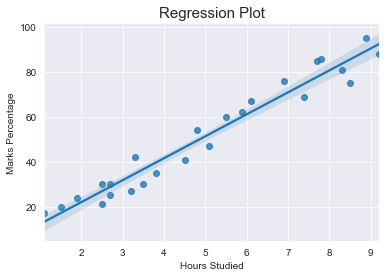

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
#Regression Plot
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=15)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()
print(df.corr())

#### The variable is positively correlated

# Model
### Spliting the Data

In [10]:
# Defining x and y from the Data
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)

### Placing Data into the model

In [11]:
regression = LinearRegression()
regression.fit(train_x, train_y)
print("Model has been trained")

Model has been trained


### Prediction of Marks based on the hours studied

In [12]:
pred_y = regression.predict(val_x)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_x], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparison Between the Real and Predicted Marks

In [13]:
compare_scores = pd.DataFrame({'Real Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Real Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visualizing the Comparison

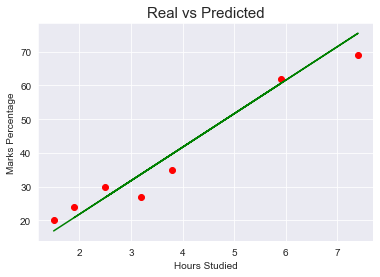

In [15]:
plt.scatter(x=val_x, y=val_y, color='red')
plt.plot(val_x, pred_y, color='green')
plt.title('Real vs Predicted', size=15)
plt.ylabel('Marks Percentage', size=10)
plt.xlabel('Hours Studied', size=10)
plt.show()

### Model Evaluation

In [16]:
# Calculation of the Accurate model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


#### The value of mean absolute error is low hence the error persentage in the predicted model is less

## Question:
### What will be the predicted score if the student studies for 9.25 hrs/ day?

In [18]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],2)))

Score = 93.89


### So from the model it is predicted that the student is likely to score 93.89 marks if they studied for 9.25 hours.